In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os.path, sys, re
from PIL import Image
# from resizeimage import resizeimage

In [31]:
#Mount Google Drive
from google.colab import drive
drive.mount('/drive')

unset HISTFILE; export PS1="root@42bdad0e010f-bbc217e048f74c1ba4df78acac248482: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content/MyDrive/MyDrive/ECG# root@42bdad0e010f-bbc217e048f74c1ba4df78acac248482: umount -f /drive || umount /drive; pkill -9 -x drive
umount: /drive: no mount point specified.
umount: /drive: no mount point specified.
root@42bdad0e010f-bbc217e048f74c1ba4df78acac248482: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@42bdad0e010f-bbc217e048f74c1ba4df78acac248482: ( while `sleep 0.5`; do if [[ -d "/drive" && "$(ls -A /drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 5715
root@42bdad0e010f-bbc217e048f74c1ba4df78acac248482: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_omit_spaces:true,read_only_

In [33]:
!cd /drive/MyDrive/ECG/

In [35]:
!ls

ls: cannot open directory '.': Transport endpoint is not connected


In [37]:
img=cv2.imread( '/drive/MyDrive/CroppedECGImages_data_v2/Normal/Cropped_Images/Normal_100Cropped_lead1.png' )

In [38]:
path="/drive/MyDrive/CroppedECGImages_data_v2/Normal/Cropped_Images"
path2="/drive/MyDrive/CSV_data_v2/NormalPersonECGImages/"

In [40]:
!cd /drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images




In [49]:
img = cv2.imread('/drive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/Normal_100Cropped_lead1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

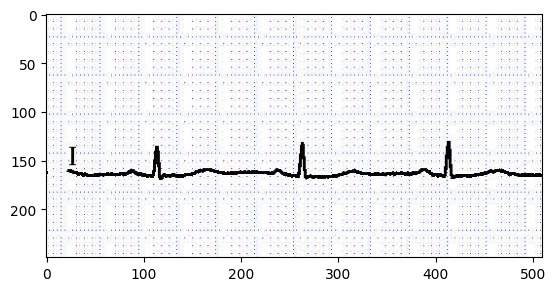

In [50]:
plt.imshow(img)

In [51]:
# Set threshold level
threshold_level = 50

# Find coordinates of all pixels below threshold
coords = np.column_stack(np.where(gray < threshold_level))

print(coords)

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
img[mask] = (204, 119, 0)

# cv2.imshow('image', img)
# cv2.waitKey()

[[131 412]
 [131 413]
 [131 414]
 ...
 [170 118]
 [170 119]
 [170 267]]


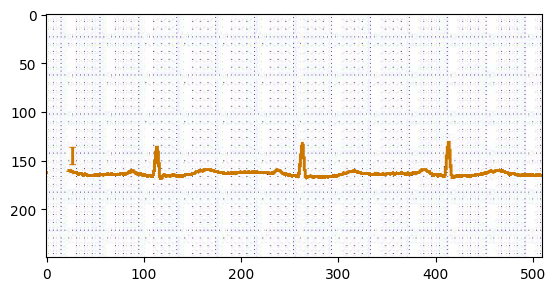

In [52]:
plt.imshow(img)
# plt.colorbar()

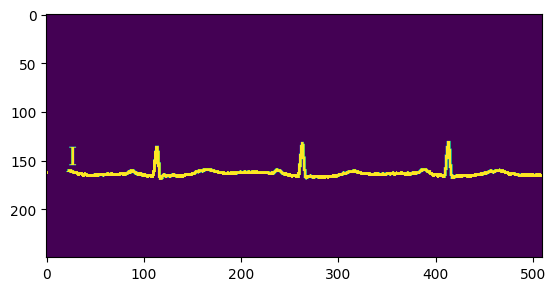

In [53]:
plt.imshow(mask)
# plt.colorbar()

In [54]:
mask.shape

(250, 510)

In [55]:
coords = np.column_stack(np.where(gray < threshold_level))


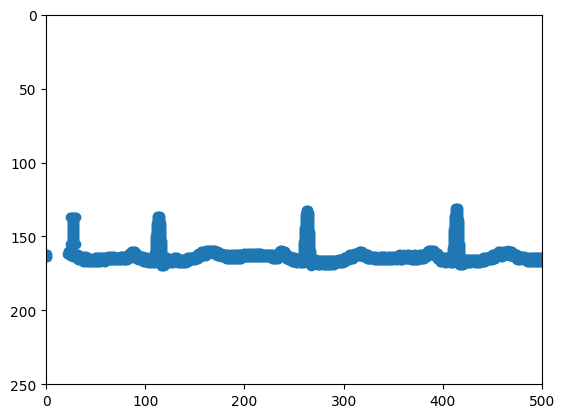

In [57]:
coords = np.column_stack(np.where(gray < threshold_level))

plt.scatter(coords[:,1], coords[:,0])
plt.axis([0, 500, 250, 0])  # Adjust the axis limits as needed
plt.show()

In [58]:
img.shape
gray.shape

(250, 510)

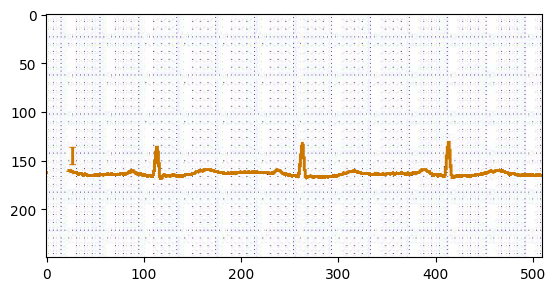

In [59]:
plt.imshow(img)

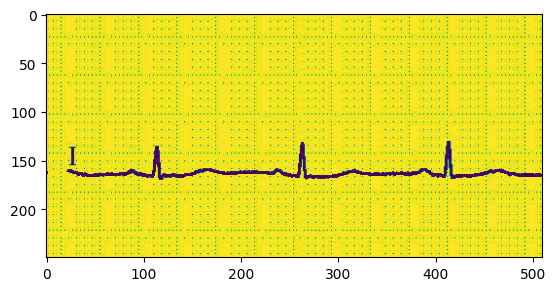

In [60]:
plt.imshow(gray)

In [61]:
'''
def show_graph(x_list, y_list, width, height):
    plt.figure(figsize = [width, height])
    plt.scatter(x_list, y_list, marker='.', s=5)
    plt.show()
    return


plt.plot(np.array(indices)[1],np.array(indices)[0])
x_list, y_list = [], []
for x in np.ra(0, 500, 1):
    for y in np.arange(0, 200, 1):
        if np.all(gray[x,y] > 200 ):
            x_list.append(x)
            y_list.append(y)

        if np.all(gray[y][x] == (0, 0, 0)):
            x_list.append(x)
            y_list.append(500-y)
plt.plot(x_list, y_list)
# show_graph(x_list, y_list, 18, 3)
'''

"\ndef show_graph(x_list, y_list, width, height):\n    plt.figure(figsize = [width, height]) \n    plt.scatter(x_list, y_list, marker='.', s=5)\n    plt.show()\n    return\n    \n    \nplt.plot(np.array(indices)[1],np.array(indices)[0])\nx_list, y_list = [], []\nfor x in np.ra(0, 500, 1):\n    for y in np.arange(0, 200, 1):        \n        if np.all(gray[x,y] > 200 ):\n            x_list.append(x)\n            y_list.append(y) \n        \n        if np.all(gray[y][x] == (0, 0, 0)):\n            x_list.append(x)\n            y_list.append(500-y)\nplt.plot(x_list, y_list)\n# show_graph(x_list, y_list, 18, 3)\n"

In [62]:
def purge(dir, pattern):
    for f in os.listdir(dir):
        if re.search(pattern, f):
            os.remove(os.path.join(dir, f))
#purge('data/NormalPersonECGImages','Cropped.*')
#purge('/','Cropped_lead*')